<a href="https://colab.research.google.com/github/rtogn/CSC4850-Machine-Learning-AssignmentTwo/blob/main/Copy_of_Assignment2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assisgment 2 - (350/400 points)

**Total points (350 undergraduate / 400 graduate)**

**Student Name: (write your name here)**

**Graduate / Undergraduate (select one)**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 for your randomseed/random state. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment2.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 50 extra credit points by doing two simple things (you need to do BOTH):

1) Make nice and pretty plots (only using the provided packages!)

2) Make your GitHub repo professional (this includes your own landing page as well). Examples: https://github.com/abhisheknaiidu/awesome-github-profile-readme


Remember that you will need a portfolio for your job search, and a professional looking repo will certainly impress recruiters/interviewers. So this is more of a favor to yourself! (yes, I follow this myself: https://github.com/jmbanda)


In [3]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split

Using the Wine dataset from sklearn:

In [4]:
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()

#Declare seed to use throughout project
seed= 1234

# Question 1 (10 points)

What can you say about the dataset (use code to descirbe it)? any particular things of interest? Find at least two things that you find interesting.

In [5]:
##### Code block for Question 1
# IDK anything about sklearn so step 1 was figure out what this even is:
print(type(wine))
# which gives '<class 'sklearn.utils.Bunch'>' which leads to https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html
# From here I can plug in some calls and start to get an idea of whats going on. 
# .keys() lists some elements of the dataset which can be plugged into get a list of features for example:
wine.keys()

# Names of the attributes contained in the dataset
feature_names = wine['feature_names']
# This frame key does not appear to contain any information
frame = wine['frame']
# Names of the classes contained in the dataset
target_names = wine['target_names']
# Helpful text info about the dataset...except that it lies sometimes. 
info = wine['DESCR']
#target is the target class for each data row?
predictions = wine['target']

# After that I went through and printed out each item to see what it did. I left them commented out after use in some cases.
print(feature_names)
#print(data)
#print(info)
data = wine['data']
print(data.shape)
#print(info)
# The info section notes ":Number of Instances: 178 (50 in each of three classes)" which neither adds up nor is true. 
# The real class counts are {0: 59, 1: 71, 2: 48}
unique, counts = np.unique(predictions, return_counts=True)
print("Instances of each class: ")
print(dict(zip(unique, counts)))


# Get instance of where class 2 starts so i can exclude it 
# Completely takes advantage of the classes being pre-sorted
index_class_2 = -1
for i in range(0, len(predictions)):
  if predictions[i] == 2:
    index_class_2 = i
    break
print(index_class_2)

<class 'sklearn.utils.Bunch'>
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
(178, 13)
Instances of each class: 
{0: 59, 1: 71, 2: 48}
130


The data portion of the set contains 178 samples with 13 attributes. There is a predictions set wtih 178 classes labeled 0,1 and 2 for each class of wine. 

The description that comes with the dataset (under the 'DESC' key) notes that there are 50 of each class which is not true. The classes count to 59, 71 and 48 respectively to a total of 178.

I noticed that all class labels were pre-sorted which is helpful. This is a fairly small dataset overall at 178 samples. 
---



# Question 2 (10 points)

Remove class_2, so it becomes a binary problem now. Split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [6]:
##### Code block for Question 2
# Take slices of data without class 2. Did this by reference, I'm sure there is a fancy boy scipi/numpy way to exclude. 
X = data[0:index_class_2] # Big X is all the data rows each 13 long. 
y = predictions[0:index_class_2] # Predicted result values. 

if 2 in y:
  print("Time to panic, you still have instances of class 2")

# Without class 2 there should be 130 rows. 
print(X.shape)
print(y.shape)

# Split up into training and test arrays with sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=seed)

# Check shapes of partitions
splits = {'X_train':X_train, 'X_test':X_test, 'y_train':y_train, 'y_test':y_test}
for key,val in splits.items():
  print("Shape of " + key + ": " + str(val.shape))


(130, 13)
(130,)
Shape of X_train: (84, 13)
Shape of X_test: (46, 13)
Shape of y_train: (84,)
Shape of y_test: (46,)


# Question 3 (30 points)

Use the perceptron algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [7]:
##### Code block for Question 3
from sklearn.linear_model import Perceptron
my_perceptron = Perceptron(tol=1e-3, random_state=seed)
my_perceptron.fit(X_train, y_train)
print("Score/accuracy for perceptron on testing data: " +  str(my_perceptron.score(X_test, y_test)))


Score/accuracy for perceptron on testing data: 0.6739130434782609


# Question 4 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 4, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [8]:
##### Code block for Question 4
from sklearn.metrics import classification_report
"""
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, 
sample_weight=None, digits=2, output_dict=False, zero_division='warn')[source]
"""
y_predictions = my_perceptron.predict(X_test)
#print(y_predictions)
wine_class_names = target_names[0:2]
print(classification_report(y_test, y_predictions, target_names=wine_class_names))

              precision    recall  f1-score   support

     class_0       1.00      0.21      0.35        19
     class_1       0.64      1.00      0.78        27

    accuracy                           0.67        46
   macro avg       0.82      0.61      0.57        46
weighted avg       0.79      0.67      0.60        46



 Overall the raw acuracy is OK, but the recall for class_0 on the training data is pretty awful. The recal is well under 50% for Class_0. 

The 'swap' between precision and recall between each class is interesting. It appears to be working well in one aspect for each class. for C_0 at least the model is poor at finding the aggregate of positive classes. 

 The F1-scores arent too bad looking as they are being carried by the scores of 1 for precision and recall for each calss. Overall the macro averages aren't too bad as well sitting around 75% except for the f1 scores. 


# Question 5 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

[[ 4 15]
 [ 0 27]]


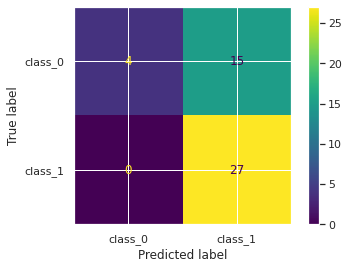

In [9]:
##### Code block for Question 5 - part 
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
#print(y_test_predictions)
conf_mat_1 = confusion_matrix(y_test, y_predictions)
print(conf_mat_1)

# Plotting of conf matrix
conf_mat_1_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat_1, display_labels=wine_class_names)
conf_mat_1_display.plot()

Text(0.5, 1.0, 'Alchalinity vs Alchohol w/ Predictions')

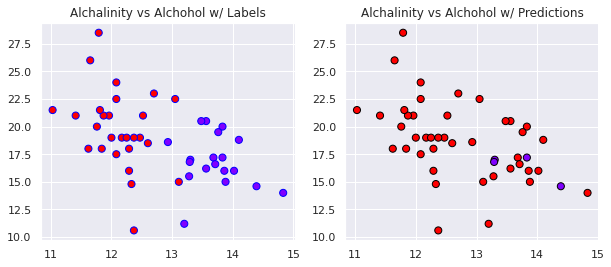

In [10]:
##### Code block for Question 5 - part 2
#X_test, y_test 
alch_i = 0
ash_i = 3
alch_test_X = X_test[:, alch_i]
ash_test_X = X_test[:, ash_i]


f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,4))
ax1.scatter(alch_test_X, ash_test_X, c=y_test, s=50, cmap='rainbow', edgecolor="blue")
ax1.set_title('Alcalinity vs Alchohol w/ Labels')


ax2.scatter(alch_test_X, ash_test_X, c=y_predictions, s=50, cmap='rainbow', edgecolor="black")  
ax2.set_title('Alcalinity vs Alchohol w/ Predictions')


# Question 6 (10 points) 

a) Do the plot right plot on Question 5 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

Textual answer to question 6 a goes here:<br>
Yes. There are 4 distinctly labeled items which matches the TT portion of the confusion matrix which also was a count of 4. 

Textual answer to question 6 b goes here. <br>
This classifier is not particuarily good, at least in the context of this dataset. It is only correctly identifying 4 members of one of the classes. It would be more effective to to a linear separation on alchohol and ash with a line at ~12.8, looking just at this test data at least. I changed around the seed as well and it interestingly did much better with different splits. Overall, I think this data just is not easily seperable by this type of algorithm.  

# Question 7 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [11]:
##### Code block for Question 7
wine_dt = datasets.load_wine()
Xdt = wine_dt['data']
ydt = wine_dt['target']
Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(Xdt, ydt, test_size=0.35, random_state=seed)


# Question 8 (30 points)

Use the Decision Tree algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [12]:
##### Code block for Question 8
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=seed)
dtree.fit(Xdt_train, ydt_train)
score = dtree.score(Xdt_test, ydt_test) # Returns 1.0 for training data which is good :) 
print("Score/Accuracy of decision tree on testing data: "+ str(score))

Score/Accuracy of decision tree on testing data: 0.9365079365079365


# Question 9 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 9, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [13]:
##### Code block for Question 9
#from sklearn.metrics import classification_report
"""
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, 
sample_weight=None, digits=2, output_dict=False, zero_division='warn')[source]
"""
ydt_predictions = dtree.predict(Xdt_test)
print(classification_report(ydt_test, ydt_predictions, target_names=target_names))

              precision    recall  f1-score   support

     class_0       1.00      0.89      0.94        19
     class_1       0.92      0.92      0.92        26
     class_2       0.90      1.00      0.95        18

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



Textual answer to question 9 goes here.<br>
This looks so much clearner than the perceptron results. Everything is above 0.89. This makes me suspicious, but based on the data and it's origin I can see it going this way. 

All classes are represented fairly equaly for every metric. I do not see any siginificant diference. 

If you run it on training data it is 1.0 all around which seems to match my assumptions of a DT algorithm. 

# Question 10 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

[[17  2  0]
 [ 0 24  2]
 [ 0  0 18]]


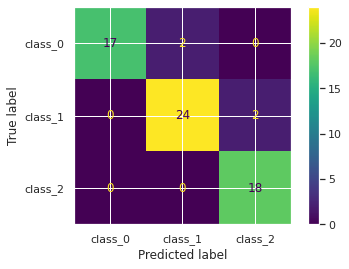

In [14]:
##### Code block for Question 10 - part 1
conf_mat_dt = confusion_matrix(ydt_test, ydt_predictions)
print(conf_mat_dt)
# Plotting of conf matrix
conf_mat_dt_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat_dt, display_labels=wine_dt['target_names'])
conf_mat_dt_display.plot()

Text(0.5, 1.0, 'Alchalinity vs Alchohol w/ Predictions')

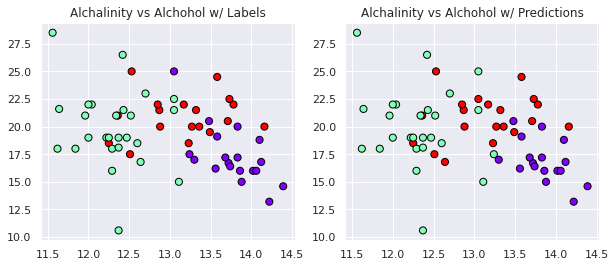

In [13]:
##### Code block for Question 10 - part 2
alch_i = 0
ash_i = 3
alch_test_X = Xdt_test[:, alch_i]
ash_test_X = Xdt_test[:, ash_i]


f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,4))
ax1.scatter(alch_test_X, ash_test_X, c=ydt_test, s=50, cmap='rainbow', edgecolor="black")
ax1.set_title('Alcalinity vs Alchohol w/ Labels')


ax2.scatter(alch_test_X, ash_test_X, c=ydt_predictions, s=50, cmap='rainbow', edgecolor="black")  
ax2.set_title('Alcalinity vs Alchohol w/ Predictions')

# Question 11 (30 points) 

a) Do the plot right plot on Question 10 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

c) Plot the figure from question 10 - part 2 using the `visualize_classifier` function given during the class example from 2/20/2023.

Textual answer to question 11 a goes here.<br>
This is a good match to the matrix. I can see 3 clearly separable classes with roughly even distribution (17-24-18 for True Positives on the confusion matrix). Counting each gets a few more of each class (roughly 18-25-18) which fills in the remaining boxes of the matrix.  


Textual answer to question 11 b goes here.<br>
Did really well compared to the perceptron.However, the confusion matrix in 3x3 is a bit more difficult to interpret compared to the 2x2. For example, True Negative requires summing different sections per class.

Overall it is interesting how even this model is at identifying each of the 3 classes. Perhaps after seeing what the perceptron did I have warped expectations for this task.

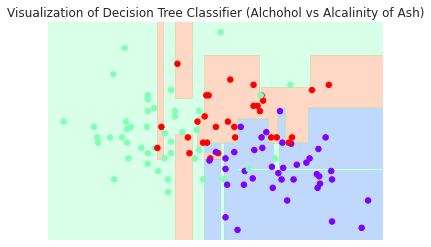

In [36]:
##### Code block for Question 11 - part c
# Copied from class example, as required.
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    ax.set_title("Visualization of Decision Tree Classifier (Alchohol vs Alcalinity of Ash)")
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
     

visualize_classifier(DecisionTreeClassifier(), Xdt_train[:,[0,3]], ydt_train)

# Question 12 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [16]:
##### Code block for Question 12
##### Code block for Question 7
wine_lr = datasets.load_wine()
Xlr = wine_lr['data']
ylr = wine_lr['target']
Xlr_train, Xlr_test, ylr_train, ylr_test = train_test_split(Xlr, ylr, test_size=0.35, random_state=seed)


# Question 13 (30 points)

Use the Logistic Regression (with as this is a multi-class problem, use the **One Vs Rest algorithm** we must use `liblinear` solver and the correct seed) to build a model on the training set and report the model's accuracy.

In [26]:
##### Code block for Question 13
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=seed, solver='liblinear')
logreg.fit(Xlr_train ,ylr_train)
score = logreg.score(Xlr_test, ylr_test)
print("Score/Accuracy of Logistic Regresson (OnevsRest) on testing data: "+ str(score))

Score/Accuracy of Logistic Regresson (OnevsRest) on testing data: 0.9523809523809523


# Question 14 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 14, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [27]:
##### Code block for Question 14
"""
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, 
sample_weight=None, digits=2, output_dict=False, zero_division='warn')[source]
"""
ylr_predictions = logreg.predict(Xlr_test)
print(classification_report(ylr_test, ylr_predictions, target_names=target_names))

              precision    recall  f1-score   support

     class_0       1.00      0.95      0.97        19
     class_1       0.96      0.92      0.94        26
     class_2       0.90      1.00      0.95        18

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.95      0.95      0.95        63



Textual answer to question 14 goes here.<br>
-This classifier was slightly better than the decision tree classifier, I wouldnt say significantly but it has some improvment for this seed at least.

-Overall it is almost perfect at classifying the wine 

-Class_2 has .90 precision which is the lowest value on the chart, though it has 1.0 recall in this case. 

# Question 15 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

[[18  1  0]
 [ 0 24  2]
 [ 0  0 18]]


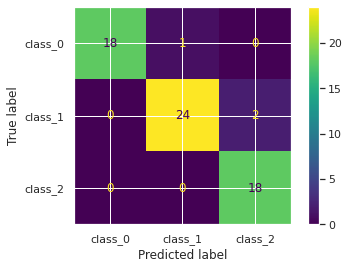

In [28]:
##### Code block for Question 15 - part 1
conf_mat_lr = confusion_matrix(ylr_test, ylr_predictions)
print(conf_mat_lr)
# Plotting of conf matrix
conf_mat_lr_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat_lr, display_labels=wine_lr['target_names'])
conf_mat_lr_display.plot()

Text(0.5, 1.0, 'Alchalinity vs Alchohol w/ Predictions')

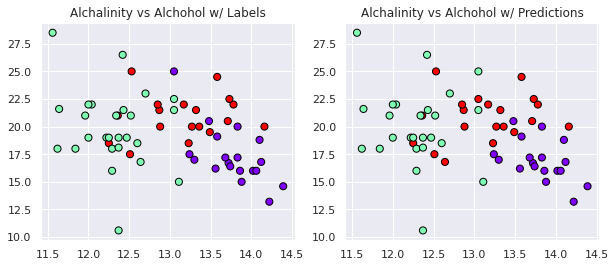

In [31]:
##### Code block for Question 15 - part 2
##### Code block for Question 10 - part 2
alch_i = 0
ash_i = 3
alch_test_X = Xlr_test[:, alch_i]
ash_test_X = Xlr_test[:, ash_i]


f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,4))
ax1.scatter(alch_test_X, ash_test_X, c=ylr_test, s=50, cmap='rainbow', edgecolor="black")
ax1.set_title('Alcalinity vs Alchohol w/ Labels')


ax2.scatter(alch_test_X, ash_test_X, c=ylr_predictions, s=50, cmap='rainbow', edgecolor="black")  
ax2.set_title('Alcalinity vs Alchohol w/ Predictions')

# Question 16 (20 points) 

a) Do the plot right plot on Question 15 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

Textual answer to question 16 a goes here.<br>
Yes, the predictiosn appear to match the confustion matrix from pt1. Each class has a similar number classified as the 'True Positives' from the confusion matrix (diagonals)

Textual answer to question 16 b goes here.<br>
This model performed almost identically to the decision tree classifier. The graphs are almost identicle. 

It apepars to only have miss-classified 3 instances based on the confusion matrix. I would like to see how it does with some fresh entries. 




# Question 17 (10 points)

Create AND display dataframe containing in each row the accruacy, precision, recall for each of the models built. 

In the textual answer cell, discuss which one is the best performing model and why?

In [66]:
##### Code block for Question 17
#accruacy, precision, recall 
from sklearn.metrics import precision_recall_fscore_support as prf
from sklearn.metrics import accuracy_score as acc

#Perceptron
Pacc = acc(y_test, y_predictions)
P = prf(y_test, y_predictions, average='macro')
Pprec = P[0]
Prec = P[1]
# Dtree
Dacc = acc(ydt_test, ydt_predictions)
D = prf(ydt_test, ydt_predictions, average='macro')
Dprec = D[0]
Drec = D[1]
# log reg
Lacc = acc(ylr_test, ylr_predictions)
L = prf(ylr_test, ylr_predictions, average='macro')
Lprec = L[0]
Lrec = L[1]

aggregate = {'accuracy':[Pacc, Dacc, Lacc], 'precision':[Pprec, Dprec, Lprec], 'recall':[Prec, Drec, Lrec]}
df = pd.DataFrame(data=aggregate, index=['Perceptron', 'Decision Tree', 'Logistic Regression'])
df #This looks nicer than a console print, at least in this notebook.
#print(df)

,accuracy,precision,recall
Perceptron,0.673913,0.821429,0.605263
Decision Tree,0.936508,0.941026,0.939271
Logistic Regression,0.952381,0.953333,0.956815


Textual answer to question 17 goes here.<br>
Overall Logistic Regression preformed the best by a slight margin of the Decision Tree algorithm. The difference is calculable on this seed at least, but may not be significant overall. Perceptron clearly preformed the worst of the three while only managing two classes instead of three, indicating that it is not very well suited for this data set. That said, it wasn't a complete failure as its calcualted precision was 82% and a recall of 60% is at least over half. 

# Graduate Student Question: (50 points)

Modify the `visualize_classifier` function provided during the 2/20/2023 class to be able to work in 3 dimensions (currently only works in two dimensions). Take the Decision Tree classifier model from Question 8 and plot the separation of the classes using the following axes: (Alcohol as the X axis and Alcalinity of Ash as the Y axis, and Ash as the Z axis).


In [1]:
##### Code block for Graduate Student Question


def visualize_classifier_3D(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    zlim = ax.get_zlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
     
visualize_classifier_3D()